In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


In [59]:
df_sea_dog = pd.read_csv(r'C:\Users\Kun\Downloads\seadog_data.csv\full.csv')
df_sea_dog.head(10)

C:\Users\Kun\AppData\Local\Temp\ipykernel_12376\3178228401.py:1: DtypeWarning: Columns (22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_dog = pd.read_csv(r'C:\Users\Kun\Downloads\seadog_data.csv\full.csv')


,Unnamed: 0,timestamp,engine_torque,engine_fuel_rate,engine_rpm,course_over_ground_magnetic,course_over_ground_true,latitude,longitude,satellites,...,leg,leg_id,leg_uuid,distance_to_next_dock,distance_to_previous_dock,segment_id,segment_uuid,accum_fuel_leg,accum_dist_leg,accum_time_leg
0,0,2022-09-07 14:39:28.500,14.0,7.15,1205.375,304.30,304.30,57.412302,10.613139,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.000596,0.000000,0.3
1,1,2022-09-07 14:39:28.800,14.0,7.15,1204.875,304.85,304.85,57.412305,10.613133,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.001192,0.101566,0.6
2,2,2022-09-07 14:39:29.100,14.0,7.15,1204.375,305.40,305.40,57.412307,10.613128,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.001788,0.259557,0.9
3,3,2022-09-07 14:39:29.400,13.0,7.15,1203.875,305.40,305.40,57.412308,10.613124,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.002383,0.447876,1.2
4,4,2022-09-07 14:39:29.700,13.0,7.15,1202.750,305.40,305.40,57.412309,10.613120,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.002979,0.652484,1.5
5,5,2022-09-07 14:39:30.000,14.0,7.15,1200.375,305.80,305.80,57.412311,10.613117,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.003575,0.868114,1.8
6,6,2022-09-07 14:39:30.300,14.0,7.15,1197.125,305.80,305.80,57.412312,10.613113,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.004171,1.091626,2.1
7,7,2022-09-07 14:39:30.600,14.0,7.15,1197.875,305.80,305.80,57.412314,10.613109,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.004767,1.320758,2.4
8,8,2022-09-07 14:39:30.900,14.0,7.15,1195.750,304.90,304.80,57.412315,10.613106,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.005363,1.554296,2.7
9,9,2022-09-07 14:39:31.200,15.0,7.15,1195.250,304.90,304.80,57.412318,10.613097,11.0,...,unknown,1,unknown,NaN,NaN,1,NaN,0.005958,1.825518,3.0


In [60]:
df_sea_dog.columns

Index(['Unnamed: 0', 'timestamp', 'engine_torque', 'engine_fuel_rate',
       'engine_rpm', 'course_over_ground_magnetic', 'course_over_ground_true',
       'latitude', 'longitude', 'satellites', 'speed_over_ground',
       'delta_distance', 'delta_timestamp', 'fuel_per_step', 'acceleration',
       'engine_on', 'steady_state', 'sailing_state', 'distance_from_dock',
       'closest_dock', 'segment_state', 'leg', 'leg_id', 'leg_uuid',
       'distance_to_next_dock', 'distance_to_previous_dock', 'segment_id',
       'segment_uuid', 'accum_fuel_leg', 'accum_dist_leg', 'accum_time_leg'],
      dtype='object')

In [61]:
df_sea_dog = df_sea_dog[["timestamp", "engine_rpm", "engine_torque", "engine_fuel_rate", "speed_over_ground"]]

In [62]:
df_sea_dog = df_sea_dog[df_sea_dog.engine_rpm > 100] 
df_sea_dog.speed_over_ground.describe()

count    433832.000000
mean          2.247168
std           1.288059
min           0.000000
25%           0.977400
50%           2.829400
75%           3.138100
max           5.298800
Name: speed_over_ground, dtype: float64

[Text(0.5, 0, 'Engine Torque'),
 Text(0, 0.5, 'Flw_FuelDiesel'),
 Text(0.5, 1.0, 'Engine Torque VS Flw_FuelDiesel')]

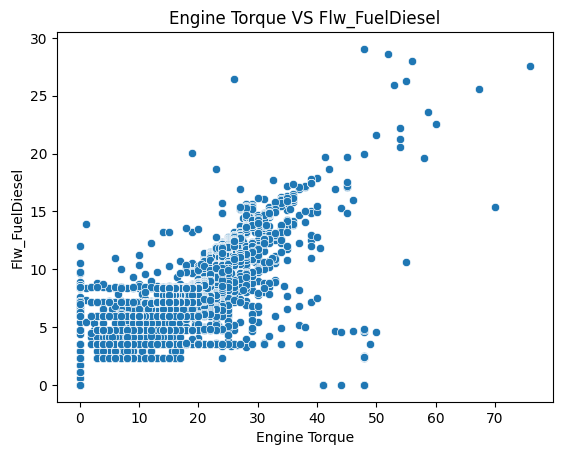

In [63]:
sns.scatterplot(data=df_sea_dog, x=df_sea_dog.engine_torque, y=df_sea_dog.engine_fuel_rate).set(xlabel="Engine Torque", ylabel = "Flw_FuelDiesel", title= "Engine Torque VS Flw_FuelDiesel")

[Text(0.5, 0, 'Engine Speed'),
 Text(0, 0.5, 'Flw_FuelDiesel'),
 Text(0.5, 1.0, 'Engine Speed VS Flw_FuelDiesel')]

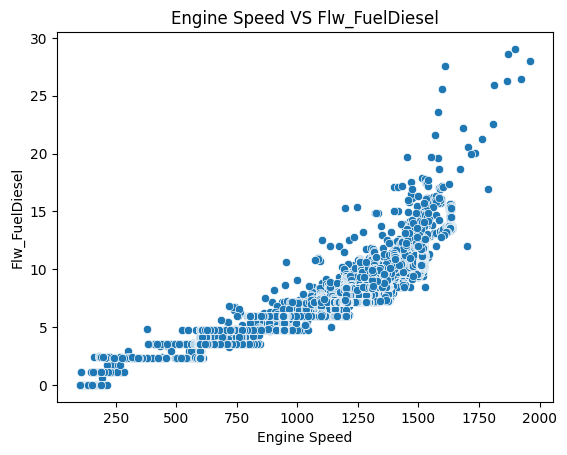

In [64]:
sns.scatterplot(data=df_sea_dog, x=df_sea_dog.engine_rpm, y=df_sea_dog.engine_fuel_rate).set(xlabel="Engine Speed", ylabel = "Flw_FuelDiesel", title= "Engine Speed VS Flw_FuelDiesel")

In [65]:
df_sea_dog.describe()

,engine_rpm,engine_torque,engine_fuel_rate,speed_over_ground
count,433832.000000,433832.000000,433832.000000,433832.000000
mean,1222.921208,17.057563,7.913906,2.247168
std,283.230703,5.732116,2.488532,1.288059
min,100.500000,0.000000,0.000000,0.000000
25%,1201.000000,15.000000,7.150000,0.977400
50%,1222.875000,16.000000,7.200000,2.829400
75%,1497.125000,23.000000,10.150000,3.138100
max,1962.750000,76.000000,29.050000,5.298800


In [66]:
df_sea_dog['timestamp'] = pd.to_datetime(df_sea_dog['timestamp'])

In [67]:
df_sea_dog['FuelConsumption'] = df_sea_dog['engine_fuel_rate']*0.3/3600

In [68]:
X, y = df_sea_dog[["engine_rpm", "engine_torque"]], df_sea_dog[["engine_fuel_rate"]]
X.shape, y.shape

((433832, 2), (433832, 1))

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)

print(f"{scaled_X.min():.2f} ≤ scaled_X ≤ {scaled_X.max():.2f}")

0.00 ≤ scaled_X ≤ 1.00


In [70]:
scaler = MinMaxScaler()
scaler.fit(y)

scaled_y = scaler.transform(y)

print(f"{scaled_y.min():.2f} ≤ scaled_y ≤ {scaled_y.max():.2f}")

0.00 ≤ scaled_y ≤ 1.00


## Models

In [71]:
with open('saved_models/SVD.pickle','rb') as f:
    model_SVD = pickle.load(f)
print(model_SVD)

LinearRegression()


In [72]:
score_SVD = model_SVD.score(scaled_X,scaled_y)

pred_SVD = model_SVD.predict(scaled_X)
mae_SVD = mean_absolute_error(scaled_y, pred_SVD)

print(f"Linear, score: {score_SVD:.7f}, MAE: {mae_SVD:.7f}")

Linear, score: 0.6003645, MAE: 0.0390685


In [73]:
with open('saved_models/poly.pickle','rb') as f:
    model_poly = pickle.load(f)
print(model_poly)

LinearRegression()


In [74]:
poly_model_3 = PolynomialFeatures(3, include_bias=False)
X_features = poly_model_3.fit_transform(scaled_X)

score_poly = model_poly.score(X_features,scaled_y)

pred_poly = model_poly.predict(X_features)
mae_poly = mean_absolute_error(scaled_y, pred_poly)

print(f"Poly, score: {score_poly:.7f}, MAE: {mae_poly:.7f}")

Poly, score: 0.7139400, MAE: 0.0396904


In [75]:
with open('saved_models/knn.pickle','rb') as f:
    model_knn = pickle.load(f)
print(model_knn)

KNeighborsRegressor(n_neighbors=7)


In [76]:
score_knn = model_knn.score(scaled_X,scaled_y)

pred_knn = model_knn.predict(scaled_X)
mae_knn = mean_absolute_error(scaled_y, pred_knn)

print(f"KNN, score: {score_knn:.7f}, MAE: {mae_knn:.7f}")

KNN, score: 0.7264777, MAE: 0.0380437


In [77]:
with open('saved_models/tree_regression.pickle','rb') as f:
    model_trees = pickle.load(f)
print(model_trees)

DecisionTreeRegressor(max_depth=7)


In [78]:
score_trees = model_trees.score(scaled_X,scaled_y)

pred_trees = model_trees.predict(scaled_X)
mae_trees = mean_absolute_error(scaled_y, pred_trees)

print(f"Trees, score: {score_trees:.7f}, MAE: {mae_trees:.7f}")

Trees, score: 0.6277163, MAE: 0.0446642


In [79]:
with open('saved_models/gbr.pickle','rb') as f:
    model_gbr = pickle.load(f)
print(model_gbr)

GradientBoostingRegressor(max_depth=7)


In [80]:
score_gbr = model_gbr.score(scaled_X,scaled_y)

pred_gbr = model_gbr.predict(scaled_X)
mae_gbr = mean_absolute_error(scaled_y, pred_gbr)

print(f"GBR, score: {score_gbr:.7f}, MAE: {mae_gbr:.7f}")

GBR, score: 0.5163481, MAE: 0.0517870


In [81]:
with open('saved_models/xgbr.pickle','rb') as f:
    model_xgbr = pickle.load(f)
print(model_xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [82]:
score_xgbr = model_xgbr.score(scaled_X,scaled_y)

pred_xgbr = model_xgbr.predict(scaled_X)
mae_xgbr = mean_absolute_error(scaled_y, pred_xgbr)

print(f"XGBR, score: {score_xgbr:.7f}, MAE: {mae_xgbr:.7f}")

XGBR, score: 0.6780889, MAE: 0.0387254


In [83]:
with open('saved_models/rfr.pickle','rb') as f:
    model_rfr = pickle.load(f)
print(model_rfr)

RandomForestRegressor()


In [84]:
score_rfr = model_rfr.score(scaled_X,scaled_y)

pred_rfr = model_rfr.predict(scaled_X)
mae_rfr = mean_absolute_error(scaled_y, pred_rfr)

print(f"Random trees, score: {score_rfr:.7f}, MAE: {mae_rfr:.7f}")

Random trees, score: 0.5095044, MAE: 0.0535173


|      Models      |      Scores and errors with X & y scaled       |    
|-----------------|-----------------|
|     Linear Regression     |     score: 0.6003645, MAE: 0.0390685   |
|           Polynormial Regression      |       score: 0.7139400, MAE: 0.0396904   |
|             KNN    |         score: 0.7264777, MAE: 0.0380437   ##| 
|             Decision Trees |         score: 0.6277163, MAE: 0.0446642    |
|             Gradient Boosting Decision Tree   |        score: 0.5163481, MAE: 0.0517870    |
|             XGboost   |        score: 0.6780889, MAE: 0.0387254  |  
|             RandomForest   |        score: 0.5095044, MAE: 0.0535173   | 

## Predictions for days and weeks

In [85]:
df_sea_dog['FuelPred_SVD'] = pred_SVD

df_sea_dog['FuelPred_Poly'] = pred_poly

df_sea_dog['FuelPred_knn'] = pred_knn

df_sea_dog['FuelPred_tree'] = pred_trees

df_sea_dog['FuelPred_gbr'] = pred_gbr

df_sea_dog['FuelPred_xgbr'] = pred_xgbr

df_sea_dog['FuelPred_rfr'] = pred_rfr

df_sea_dog.columns

Index(['timestamp', 'engine_rpm', 'engine_torque', 'engine_fuel_rate',
       'speed_over_ground', 'FuelConsumption', 'FuelPred_SVD', 'FuelPred_Poly',
       'FuelPred_knn', 'FuelPred_tree', 'FuelPred_gbr', 'FuelPred_xgbr',
       'FuelPred_rfr'],
      dtype='object')

In [86]:
df_sea_dog = df_sea_dog.set_index("timestamp")

In [87]:
df_sea_dog_days = df_sea_dog.groupby(pd.Grouper(freq = 'd')).sum().reset_index()
df_sea_dog_days

,timestamp,engine_rpm,engine_torque,engine_fuel_rate,speed_over_ground,FuelConsumption,FuelPred_SVD,FuelPred_Poly,FuelPred_knn,FuelPred_tree,FuelPred_gbr,FuelPred_xgbr,FuelPred_rfr
0,2022-09-07,8.489583e+07,1276438.5,591048.450,171620.22275,49.254037,19440.822957,18567.344772,18759.549356,19123.660032,19842.663828,21127.634766,19052.609182
1,2022-09-08,0.000000e+00,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-09-09,0.000000e+00,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-09-10,0.000000e+00,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022-09-11,0.000000e+00,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2022-09-12,5.575918e+06,80393.5,35440.500,11566.02360,2.953375,1218.828111,1152.076339,1170.914163,1244.753125,1260.509798,1262.235596,1127.873958
6,2022-09-13,8.497735e+07,1331813.0,611492.900,135300.66060,50.957742,20318.847115,19584.295621,19353.227468,19733.814680,20364.598376,21282.230469,19412.624344
7,2022-09-14,3.587918e+07,513807.0,230280.325,80421.37025,19.190027,7618.221574,7158.347529,7210.647456,7026.352642,7247.464123,7696.885254,6802.364441
8,2022-09-15,2.645966e+07,334568.0,156499.575,60230.68205,13.041631,4126.706774,4273.087431,4538.093807,4491.782082,4090.800976,4953.454102,4029.341903
9,2022-09-16,0.000000e+00,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
df_sea_dog_weeks = df_sea_dog.groupby(pd.Grouper(freq = '7d')).sum().reset_index()
df_sea_dog_weeks

,timestamp,engine_rpm,engine_torque,engine_fuel_rate,speed_over_ground,FuelConsumption,FuelPred_SVD,FuelPred_Poly,FuelPred_knn,FuelPred_tree,FuelPred_gbr,FuelPred_xgbr,FuelPred_rfr
0,2022-09-07,1.754491e+08,2688645.0,1237981.850,318486.90695,103.165154,40978.498183,39303.716732,39283.690987,40102.227837,41467.772002,43672.101562,39593.107484
1,2022-09-14,1.447877e+08,1915417.0,878823.450,310653.28150,73.235287,26357.217398,25190.187072,25473.323728,25546.512219,23685.001299,26737.554688,23329.579210
2,2022-09-21,1.561270e+08,2084249.5,991227.150,276042.04225,82.602262,28239.880237,28071.914726,28906.259963,29318.780878,28148.072138,32356.769531,28155.744565
3,2022-09-28,5.417855e+07,711805.0,325273.175,69711.36605,27.106098,9870.228212,9338.139817,9340.464746,9587.581273,8816.440070,10181.158203,8752.747430


- Create 1 day factor for sea_dog from 9/sep

In [89]:
factor_1_day_SVD = (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_SVD"][0]).round(7)
factor_1_day_Poly= (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_Poly"][0]).round(7)
factor_1_day_knn = (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_knn"][0]).round(7)
factor_1_day_tree = (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_tree"][0]).round(7)
factor_1_day_gbr = (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_gbr"][0]).round(7)
factor_1_day_xgbr = (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_xgbr"][0]).round(7)
factor_1_day_rfr = (df_sea_dog_days["FuelConsumption"][0]/df_sea_dog_days["FuelPred_rfr"][0]).round(7)

print(f"factor_1_day_SVD = {factor_1_day_SVD}, factor_1_day_Poly = {factor_1_day_Poly}, ffactor_1_day_knn = {factor_1_day_knn}, factor_1_day_tree = {factor_1_day_tree}, factor_1_day_gbr = {factor_1_day_gbr}, factor_1_day_xgbr = {factor_1_day_xgbr}, factor_1_day_rfr = {factor_1_day_rfr} ")


factor_1_day_SVD = 0.0025335, factor_1_day_Poly = 0.0026527, ffactor_1_day_knn = 0.0026255, factor_1_day_tree = 0.0025756, factor_1_day_gbr = 0.0024822, factor_1_day_xgbr = 0.0023313, factor_1_day_rfr = 0.0025852 


[Text(0.5, 1.0, 'Fuel consumptions and estimations(all models) by using 1 day factor(Sea_dog) for all days')]

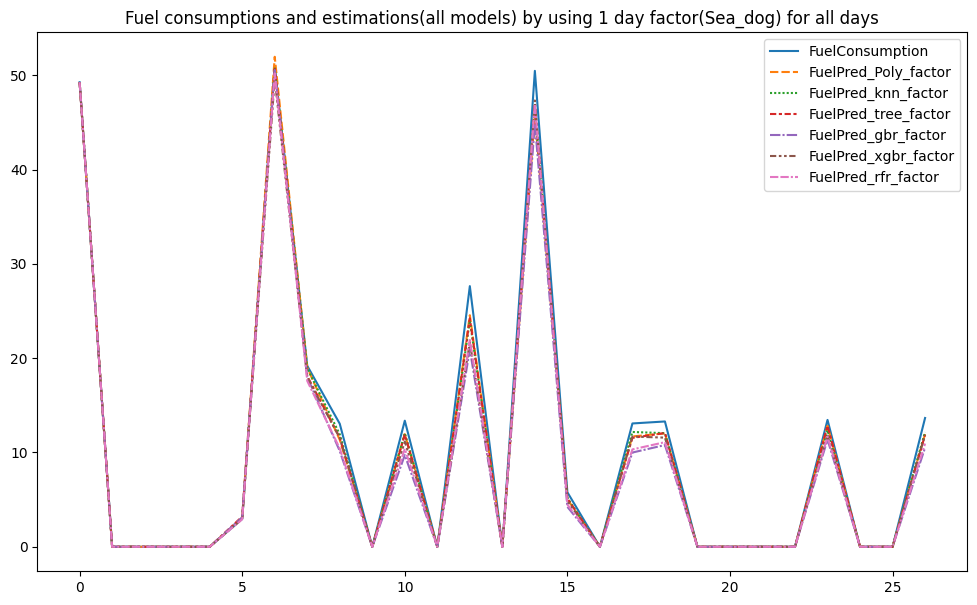

In [90]:
df_sea_dog_days["FuelPred_svd_factor"] = df_sea_dog_days["FuelPred_SVD"]*factor_1_day_SVD
df_sea_dog_days["FuelPred_Poly_factor"] = df_sea_dog_days["FuelPred_Poly"]*factor_1_day_Poly
df_sea_dog_days["FuelPred_knn_factor"] = df_sea_dog_days["FuelPred_knn"]*factor_1_day_knn
df_sea_dog_days["FuelPred_tree_factor"] = df_sea_dog_days["FuelPred_tree"]*factor_1_day_tree
df_sea_dog_days["FuelPred_gbr_factor"] = df_sea_dog_days["FuelPred_gbr"]*factor_1_day_gbr
df_sea_dog_days["FuelPred_xgbr_factor"] = df_sea_dog_days["FuelPred_xgbr"]*factor_1_day_xgbr
df_sea_dog_days["FuelPred_rfr_factor"] = df_sea_dog_days["FuelPred_rfr"]*factor_1_day_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_days[["FuelConsumption", "FuelPred_Poly_factor", "FuelPred_knn_factor", "FuelPred_tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations(all models) by using 1 day factor(Sea_dog) for all days")

- Create 1 week factor for sea_dog from 9/sep

In [91]:
factor_1_week_SVD = (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_SVD"][0]).round(7)
factor_1_week_Poly= (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_Poly"][0]).round(7)
factor_1_week_knn = (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_knn"][0]).round(7)
factor_1_week_tree = (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_tree"][0]).round(7)
factor_1_week_gbr = (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_gbr"][0]).round(7)
factor_1_week_xgbr = (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_xgbr"][0]).round(7)
factor_1_week_rfr = (df_sea_dog_weeks["FuelConsumption"][0]/df_sea_dog_weeks["FuelPred_rfr"][0]).round(7)

print(f"factor_1_week_SVD = {factor_1_week_SVD}, factor_1_week_Poly = {factor_1_week_Poly}, factor_1_week_knn = {factor_1_week_knn}, factor_1_week_tree = {factor_1_week_tree}, factor_1_week_gbr = {factor_1_week_gbr}, factor_1_week_xgbr = {factor_1_week_xgbr}, factor_1_week_rfr = {factor_1_week_rfr} ")


factor_1_week_SVD = 0.0025175, factor_1_week_Poly = 0.0026248, factor_1_week_knn = 0.0026262, factor_1_week_tree = 0.0025726, factor_1_week_gbr = 0.0024878, factor_1_week_xgbr = 0.0023623, factor_1_week_rfr = 0.0026056 


[Text(0.5, 1.0, 'Fuel consumptions and estimations(all models) by using 1 week factor(Sea_dog) for all weeks')]

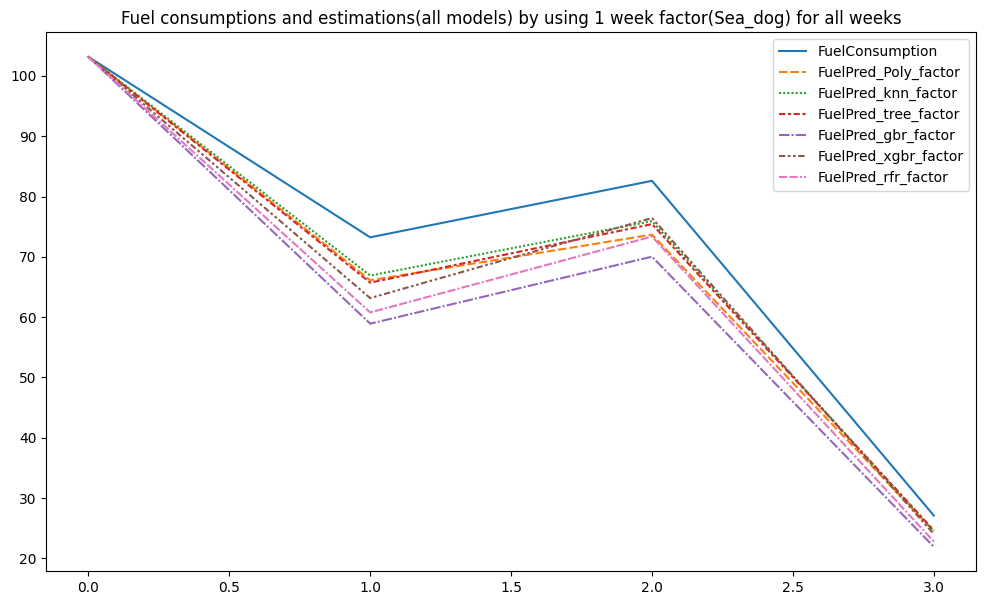

In [92]:
df_sea_dog_weeks["FuelPred_svd_factor"] = df_sea_dog_weeks["FuelPred_SVD"]*factor_1_week_SVD
df_sea_dog_weeks["FuelPred_Poly_factor"] = df_sea_dog_weeks["FuelPred_Poly"]*factor_1_week_Poly
df_sea_dog_weeks["FuelPred_knn_factor"] = df_sea_dog_weeks["FuelPred_knn"]*factor_1_week_knn
df_sea_dog_weeks["FuelPred_tree_factor"] = df_sea_dog_weeks["FuelPred_tree"]*factor_1_week_tree
df_sea_dog_weeks["FuelPred_gbr_factor"] = df_sea_dog_weeks["FuelPred_gbr"]*factor_1_week_gbr
df_sea_dog_weeks["FuelPred_xgbr_factor"] = df_sea_dog_weeks["FuelPred_xgbr"]*factor_1_week_xgbr
df_sea_dog_weeks["FuelPred_rfr_factor"] = df_sea_dog_weeks["FuelPred_rfr"]*factor_1_week_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_weeks[["FuelConsumption", "FuelPred_Poly_factor", "FuelPred_knn_factor", "FuelPred_tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations(all models) by using 1 week factor(Sea_dog) for all weeks")

- use 1 day factor to predict all weeks

[Text(0.5, 1.0, 'Fuel consumptions and estimations(all models) by using 1 day factor(Sea_dog) for all weeks')]

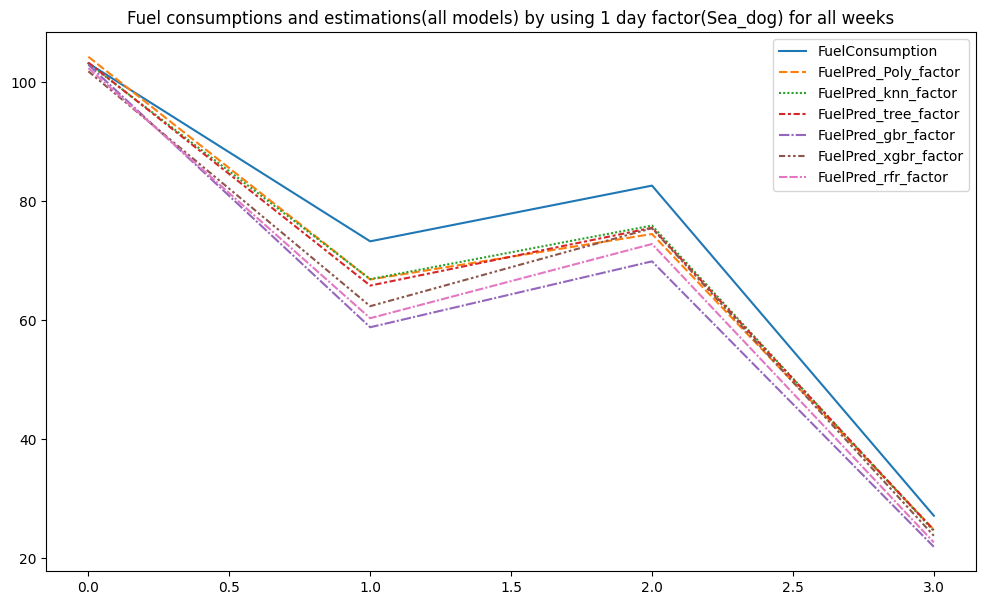

In [93]:
df_sea_dog_weeks["FuelPred_svd_factor"] = df_sea_dog_weeks["FuelPred_SVD"]*factor_1_day_SVD
df_sea_dog_weeks["FuelPred_Poly_factor"] = df_sea_dog_weeks["FuelPred_Poly"]*factor_1_day_Poly
df_sea_dog_weeks["FuelPred_knn_factor"] = df_sea_dog_weeks["FuelPred_knn"]*factor_1_day_knn
df_sea_dog_weeks["FuelPred_tree_factor"] = df_sea_dog_weeks["FuelPred_tree"]*factor_1_day_tree
df_sea_dog_weeks["FuelPred_gbr_factor"] = df_sea_dog_weeks["FuelPred_gbr"]*factor_1_day_gbr
df_sea_dog_weeks["FuelPred_xgbr_factor"] = df_sea_dog_weeks["FuelPred_xgbr"]*factor_1_day_xgbr
df_sea_dog_weeks["FuelPred_rfr_factor"] = df_sea_dog_weeks["FuelPred_rfr"]*factor_1_day_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_weeks[["FuelConsumption", "FuelPred_Poly_factor", "FuelPred_knn_factor", "FuelPred_tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations(all models) by using 1 day factor(Sea_dog) for all weeks")

### Here we using the mean() of the day factors from Burö sep-nov

In [94]:
factor_day_mean_SVD = 0.0061142
factor_day_mean_poly =0.0056373 
factor_day_mean_knn= 0.0056435 
factor_day_mean_tree =0.0058123
factor_day_mean_gbr =0.0056348
factor_day_mean_xgbr =0.0055181
factor_day_mean_rfr =0.0056813 

[Text(0.5, 1.0, 'Fuel consumptions and estimations(all models) by using 1 day factor(Sep) for all days')]

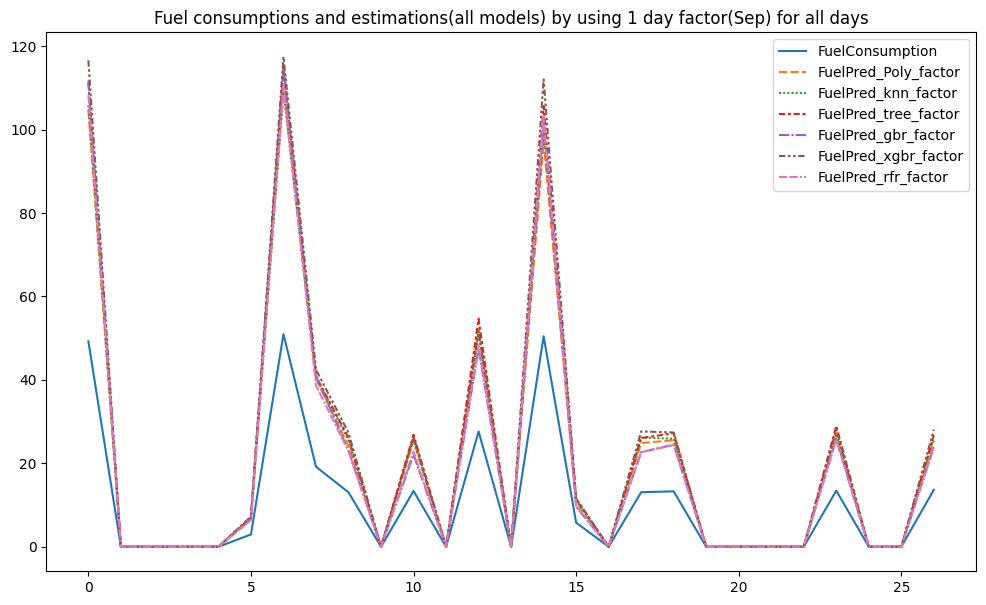

In [95]:
df_sea_dog_days["FuelPred_svd_factor"] = df_sea_dog_days["FuelPred_SVD"]*factor_day_mean_SVD
df_sea_dog_days["FuelPred_Poly_factor"] = df_sea_dog_days["FuelPred_Poly"]*factor_day_mean_poly
df_sea_dog_days["FuelPred_knn_factor"] = df_sea_dog_days["FuelPred_knn"]*factor_day_mean_knn
df_sea_dog_days["FuelPred_tree_factor"] = df_sea_dog_days["FuelPred_tree"]*factor_day_mean_tree
df_sea_dog_days["FuelPred_gbr_factor"] = df_sea_dog_days["FuelPred_gbr"]*factor_day_mean_gbr
df_sea_dog_days["FuelPred_xgbr_factor"] = df_sea_dog_days["FuelPred_xgbr"]*factor_day_mean_xgbr
df_sea_dog_days["FuelPred_rfr_factor"] = df_sea_dog_days["FuelPred_rfr"]*factor_day_mean_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_days[["FuelConsumption", "FuelPred_Poly_factor", "FuelPred_knn_factor", "FuelPred_tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations(all models) by using 1 day factor(Sep) for all days")

### Here we using the 1st day factors from Burö July

In [96]:
factor_day_SVD_july = 0.0049218
factor_day_Poly_july = 0.0046389
factor_day_knn_july = 0.0046702
factor_day_tree_july = 0.0046537
factor_day_gbr_july = 0.0045332
factor_day_xgbr_july = 0.0045097
factor_day_rfr_july = 0.0046573 

[Text(0.5, 1.0, 'Fuel consumptions and estimations(all models) by using 1 day factor(July) for all days')]

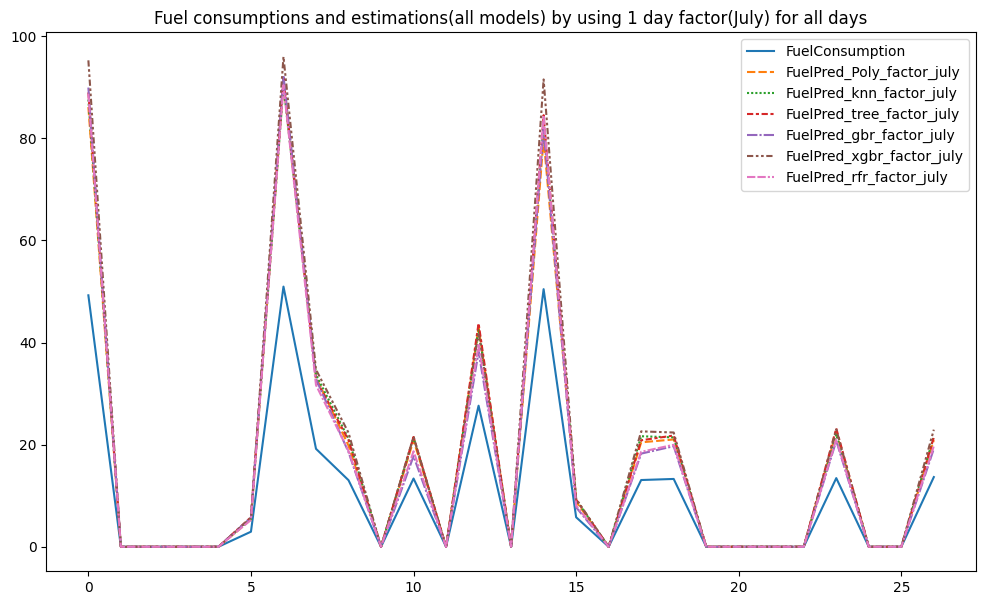

In [97]:
df_sea_dog_days["FuelPred_svd_factor_july"] = df_sea_dog_days["FuelPred_SVD"]*factor_day_SVD_july
df_sea_dog_days["FuelPred_Poly_factor_july"] = df_sea_dog_days["FuelPred_Poly"]*factor_day_Poly_july
df_sea_dog_days["FuelPred_knn_factor_july"] = df_sea_dog_days["FuelPred_knn"]*factor_day_knn_july
df_sea_dog_days["FuelPred_tree_factor_july"] = df_sea_dog_days["FuelPred_tree"]*factor_day_tree_july
df_sea_dog_days["FuelPred_gbr_factor_july"] = df_sea_dog_days["FuelPred_gbr"]*factor_day_gbr_july
df_sea_dog_days["FuelPred_xgbr_factor_july"] = df_sea_dog_days["FuelPred_xgbr"]*factor_day_xgbr_july
df_sea_dog_days["FuelPred_rfr_factor_july"] = df_sea_dog_days["FuelPred_rfr"]*factor_day_rfr_july

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_days[["FuelConsumption", "FuelPred_Poly_factor_july", "FuelPred_knn_factor_july", "FuelPred_tree_factor_july", "FuelPred_gbr_factor_july", "FuelPred_xgbr_factor_july", "FuelPred_rfr_factor_july"]]).set(title = "Fuel consumptions and estimations(all models) by using 1 day factor(July) for all days")

## Predictions in 2st speed levels

In [98]:
df_sea_dog_speed = df_sea_dog[df_sea_dog.engine_rpm > 100] 
df_sea_dog_speed.speed_over_ground.describe()

count    433832.000000
mean          2.247168
std           1.288059
min           0.000000
25%           0.977400
50%           2.829400
75%           3.138100
max           5.298800
Name: speed_over_ground, dtype: float64

In [99]:
df_sea_dog_speed_1 = df_sea_dog_speed.loc[(df_sea_dog_speed.speed_over_ground >= 0)&(df_sea_dog_speed.speed_over_ground < 2.829400)]
df_sea_dog_speed_2 = df_sea_dog_speed.loc[(df_sea_dog_speed.speed_over_ground >= 2.829400)&(df_sea_dog_speed.speed_over_ground < 5.298800)]

df_sea_dog_speed_1.shape, df_sea_dog_speed_2.shape

((206195, 12), (227634, 12))

In [100]:
df_sea_dog_speed_1_days = df_sea_dog_speed_1.groupby(pd.Grouper(freq = 'd')).sum().reset_index()
df_sea_dog_speed_2_days = df_sea_dog_speed_2.groupby(pd.Grouper(freq = 'd')).sum().reset_index()

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for lower speed by days')]

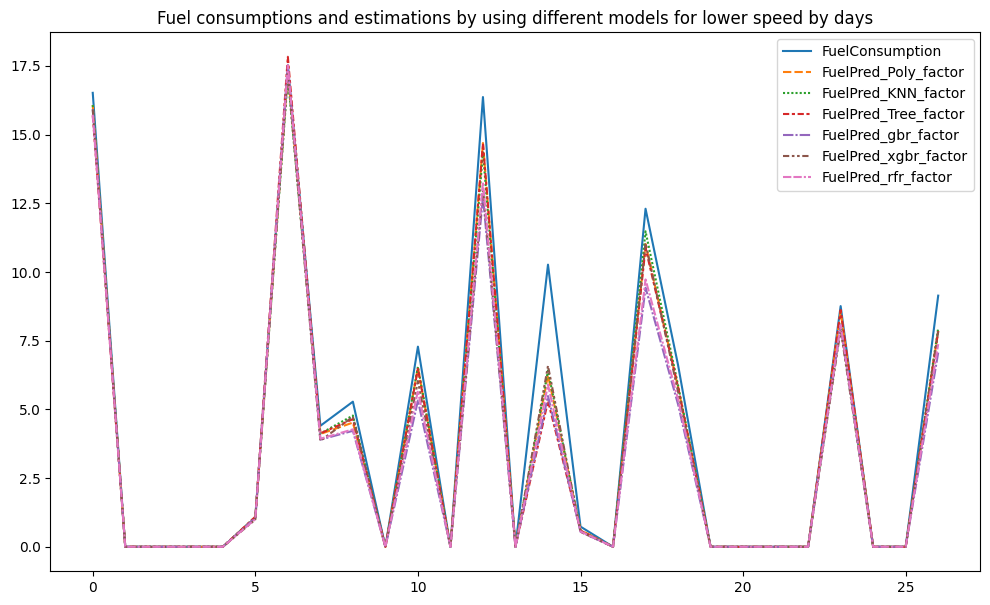

In [101]:
df_sea_dog_speed_1_days["FuelPred_SVD_factor"] = df_sea_dog_speed_1_days["FuelPred_SVD"]*factor_1_day_SVD
df_sea_dog_speed_1_days["FuelPred_Poly_factor"] = df_sea_dog_speed_1_days["FuelPred_Poly"]*factor_1_day_Poly
df_sea_dog_speed_1_days["FuelPred_KNN_factor"] = df_sea_dog_speed_1_days["FuelPred_knn"]*factor_1_day_knn
df_sea_dog_speed_1_days["FuelPred_Tree_factor"] = df_sea_dog_speed_1_days["FuelPred_tree"]*factor_1_day_tree
df_sea_dog_speed_1_days["FuelPred_gbr_factor"] = df_sea_dog_speed_1_days["FuelPred_gbr"]*factor_1_day_gbr
df_sea_dog_speed_1_days["FuelPred_xgbr_factor"] = df_sea_dog_speed_1_days["FuelPred_xgbr"]*factor_1_day_xgbr
df_sea_dog_speed_1_days["FuelPred_rfr_factor"] = df_sea_dog_speed_1_days["FuelPred_rfr"]*factor_1_day_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_speed_1_days[["FuelConsumption", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for lower speed by days")

[Text(0.5, 1.0, 'Fuel consumptions and estimations by using different models for high speed by days')]

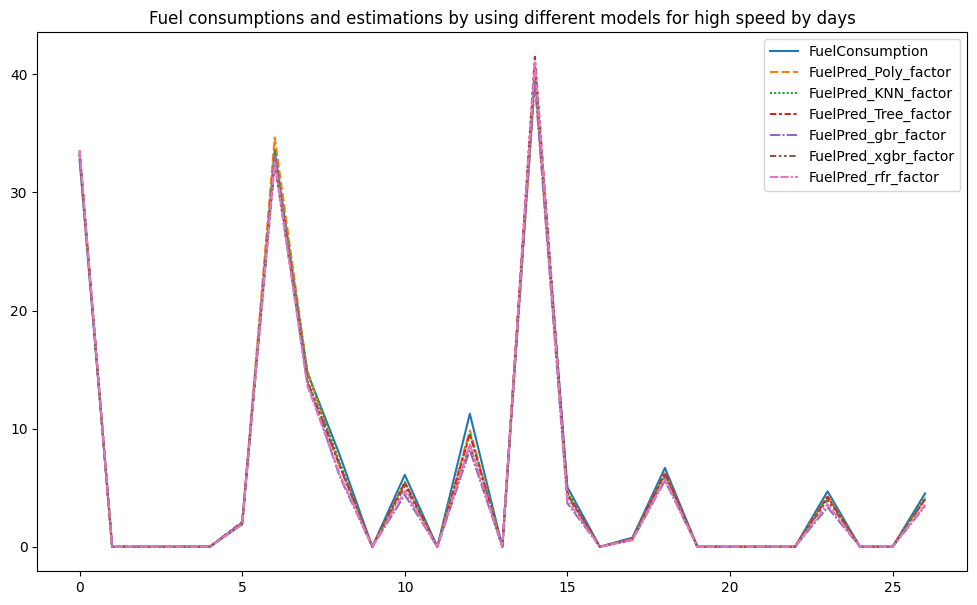

In [102]:
df_sea_dog_speed_2_days["FuelPred_SVD_factor"] = df_sea_dog_speed_2_days["FuelPred_SVD"]*factor_1_day_SVD
df_sea_dog_speed_2_days["FuelPred_Poly_factor"] = df_sea_dog_speed_2_days["FuelPred_Poly"]*factor_1_day_Poly
df_sea_dog_speed_2_days["FuelPred_KNN_factor"] = df_sea_dog_speed_2_days["FuelPred_knn"]*factor_1_day_knn
df_sea_dog_speed_2_days["FuelPred_Tree_factor"] = df_sea_dog_speed_2_days["FuelPred_tree"]*factor_1_day_tree
df_sea_dog_speed_2_days["FuelPred_gbr_factor"] = df_sea_dog_speed_2_days["FuelPred_gbr"]*factor_1_day_gbr
df_sea_dog_speed_2_days["FuelPred_xgbr_factor"] = df_sea_dog_speed_2_days["FuelPred_xgbr"]*factor_1_day_xgbr
df_sea_dog_speed_2_days["FuelPred_rfr_factor"] = df_sea_dog_speed_2_days["FuelPred_rfr"]*factor_1_day_rfr

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_sea_dog_speed_2_days[["FuelConsumption", "FuelPred_Poly_factor","FuelPred_KNN_factor", "FuelPred_Tree_factor", "FuelPred_gbr_factor", "FuelPred_xgbr_factor", "FuelPred_rfr_factor"]]).set(title = "Fuel consumptions and estimations by using different models for high speed by days")